In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# one variate rnn model

In [5]:
df=pd.read_csv('/content/drive/MyDrive/C2/Session 6/Air_pollution.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


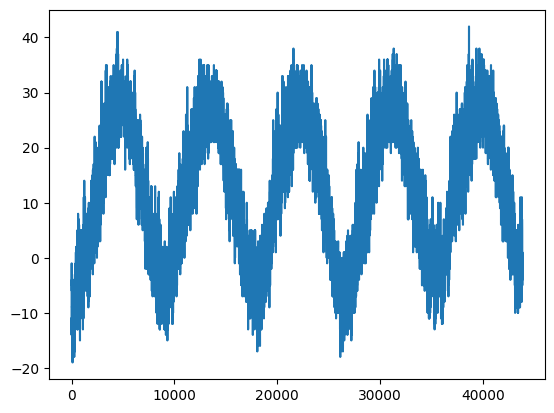

In [7]:
import matplotlib.pyplot as plt
plt.plot(df['TEMP'])

In [8]:
X=df['TEMP']

In [9]:
import numpy as np

def create_time_windows(vector, window_size, step_size):
    """
    Create time windows from the input vector.

    Parameters:
    vector (np.ndarray): Input vector.
    window_size (int): Size of each window.
    step_size (int): Step size between windows.

    Returns:
    np.ndarray: Array of windows.
    """
    num_windows = (len(vector) - window_size) // step_size + 1
    windows = np.array([vector[i*step_size:i*step_size+window_size] for i in range(num_windows)])
    return windows


windows = create_time_windows(X, 24, 12)
print(windows)


[[-11. -12. -11. ...  -5.  -5.  -5.]
 [ -5.  -3.  -2. ...  -5.  -5.  -5.]
 [ -4.  -4.  -5. ...  -5.  -6.  -6.]
 ...
 [ -2.  -2.  -4. ...   4.   2.   0.]
 [  7.   6.   6. ...  -3.  -2.  -2.]
 [ -1.  -1.  -1. ...  -3.  -4.  -3.]]


In [10]:
y=pd.DataFrame(windows)[23].values
y

array([-5., -5., -6., ...,  0., -2., -3.])

In [11]:
X=pd.DataFrame(windows).iloc[:,:23]
X
# X.drop(index=[3648],inplace=True)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-11.0,-12.0,-11.0,-14.0,-12.0,-10.0,-9.0,-9.0,-9.0,-8.0,...,-3.0,-2.0,-1.0,-2.0,-3.0,-5.0,-4.0,-5.0,-5.0,-5.0
1,-5.0,-3.0,-2.0,-1.0,-2.0,-3.0,-5.0,-4.0,-5.0,-5.0,...,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0,-5.0,-6.0,-5.0,-5.0
2,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0,-5.0,-6.0,-5.0,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-6.0
3,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,...,-6.0,-7.0,-7.0,-7.0,-8.0,-8.0,-9.0,-9.0,-9.0,-9.0
4,-6.0,-6.0,-7.0,-7.0,-7.0,-8.0,-8.0,-9.0,-9.0,-9.0,...,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-10.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,-4.0,-5.0,-5.0,-6.0,-7.0,-7.0,-8.0,-7.0,-6.0,-2.0,...,11.0,11.0,11.0,11.0,10.0,6.0,3.0,1.0,0.0,-3.0
3647,9.0,11.0,11.0,11.0,11.0,10.0,6.0,3.0,1.0,0.0,...,-2.0,-4.0,-2.0,-5.0,-3.0,-2.0,-3.0,0.0,2.0,5.0
3648,-2.0,-2.0,-4.0,-2.0,-5.0,-3.0,-2.0,-3.0,0.0,2.0,...,6.0,6.0,6.0,6.0,5.0,2.0,6.0,5.0,4.0,2.0
3649,7.0,6.0,6.0,6.0,6.0,5.0,2.0,6.0,5.0,4.0,...,-1.0,-1.0,-1.0,-2.0,-3.0,-4.0,-5.0,-5.0,-3.0,-2.0


In [12]:
print(X.shape)
print(y.shape)

(3651, 23)
(3651,)


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_vector = scaler.fit_transform(X.values.reshape(-1, 1)).flatten()
normalized_vector, scaler

(array([0.13114754, 0.1147541 , 0.13114754, ..., 0.26229508, 0.26229508,
        0.24590164]),
 MinMaxScaler())

In [18]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42,shuffle=False)

X_train=X.iloc[:3000]
X_test=X.iloc[3000:]
y_train=y[:3000]
y_test=y[3000:]



In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM
import warnings
warnings.ignore()

# Example data
n_samples = 1000  # Number of samples in your dataset
timesteps = 24    # Number of timesteps (features per sample)
input_dim = 1     # Since each feature is one-dimensional


# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}")

# Predict using the model
predictions = model.predict(X_test)
print(predictions)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 238.5980
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9334
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8996
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7634
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.6747
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4575
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5049
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4852
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3824
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4480
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4318
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4281
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4535
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3370
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.2310
Epoch 16/20
94/94 ━━━━━━━━━

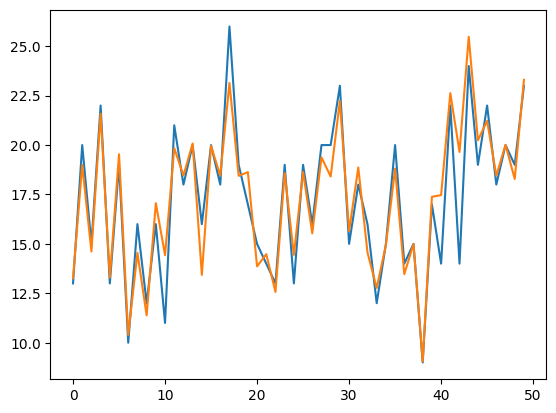

In [20]:
plt.plot(y_test[100:150])
plt.plot(predictions[100:150])

# multivariate RNN

In [23]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/C2/Session 6/LSTM-Multivariate_pollution.csv')
df

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...
43795,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43796,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43797,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43798,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS_course/00-Thursday/Session 4/LSTM-Multivariate_pollution.csv')
df['date']=df['date'].apply(lambda x: x[:10])

d=df['date']
df=pd.get_dummies(df.iloc[:,1:])
df['date']=d
df=df.replace(False,0)
df=df.replace(True,1)

- Pollution(n)-temp(n)-press(n)-wnd_spd(n) => Pollution(n+1)
- Pollution(n)-temp(n)-press(n)-wnd_spd(n) => Pollution(n+1),temp(n+1)


In [ ]:
# df.groupby('date')['pollution'].mean()
new_df=pd.DataFrame(columns=df.columns)
new_df
for item in df.columns[:-1]:
  new_df[item]=df.groupby('date')[item].mean()

In [ ]:
df2=new_df.reset_index(drop=True)
df2.drop(columns=['date'],inplace=True)
df2

,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
0,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,0.000000,0.000000,1.000000,0.000000
1,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,0.000000,0.166667,0.750000,0.083333
2,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
3,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,0.375000,0.583333,0.000000,0.041667
4,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,0.500000,0.416667,0.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...
1820,238.666667,-9.666667,-1.791667,1027.833333,9.278333,0.000000,0.0,0.000000,0.541667,0.125000,0.333333
1821,197.375000,-10.791667,1.583333,1019.958333,10.948750,0.000000,0.0,0.166667,0.625000,0.000000,0.208333
1822,159.000000,-12.333333,0.750000,1013.750000,8.000000,0.000000,0.0,0.041667,0.375000,0.000000,0.583333
1823,46.083333,-13.916667,1.875000,1019.125000,9.778333,0.000000,0.0,0.125000,0.500000,0.208333,0.166667


In [ ]:
# windowing
def _time_windowing(df,window_size):
  windowed=[]
  for item in range(window_size,len(df)):
    windowed.append(df.iloc[item-window_size:item,:].values.flatten())
  print(np.array(windowed).shape)
  return windowed

temp=_time_windowing(df2,7)

(1818, 77)


In [ ]:
X=pd.DataFrame(temp).iloc[:-1,:]

In [ ]:
y=df2['pollution'][8:].values

In [ ]:
print(X.shape,y.shape)

(1817, 77) (1817,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# y= scaler.fit_transform(y)


In [ ]:
X=pd.DataFrame(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)


In [ ]:
X_train.shape

(1453, 77)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM

# Example data
n_samples = 1000  # Number of samples in your dataset
timesteps = 24    # Number of timesteps (features per sample)
input_dim = 1     # Since each feature is one-dimensional


# Build the RNN model
model = Sequential()
# model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1),return_sequences=True))
model.add(LSTM(150, activation='relu',return_sequences=True))
model.add(LSTM(250, activation='relu',return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Model Loss: {loss}")

# Predict using the model
predictions = model.predict(X_test)
print(predictions)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 480ms/step - loss: 267156684800.0000
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - loss: 1315186.3750
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 487ms/step - loss: 1141438.1250
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 538ms/step - loss: 14647.2979
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 517ms/step - loss: 12734.4395
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 500ms/step - loss: 13338.3066
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 499ms/step - loss: 15401.0938
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 527ms/step - loss: 14630.1475
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 499ms/step - loss: 13513.6045
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 484ms/step - loss: 13654.2090
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 522ms/step - loss: 14918.0420
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 527ms/step - loss: 15270.1611
Epoch 13/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 519ms/step - loss: 14314.8281
Epoch 14/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 40s 499ms/step - loss

In [ ]:
# model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, len(features))))
from tensorflow.keras.layers import LSTM, Dense, GRU

In [ ]:
temp=[]
for item in predictions:
  temp.append(item[1])

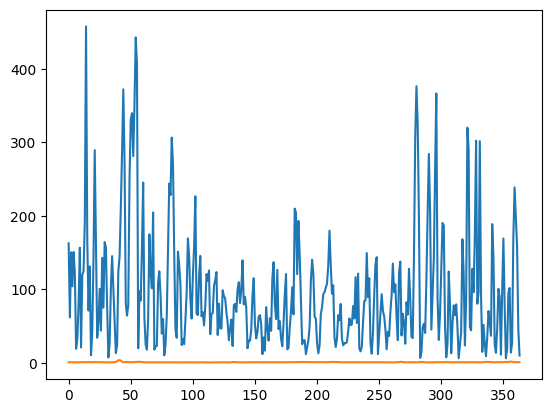

In [ ]:
plt.plot(y_test[:])
plt.plot(predictions[:])